[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS108/Lectures-Fa22/blob/master/05_Inference/06_01a_inference.ipynb)

# Inference: Linear Regression

- **simple linear regression**
    - effect size
    - p-value
    - interpretation
- **multiple linear regression**
    - confounding
- working with **transformed data**

In [21]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

## The Question

Does Poverty Percentage affect Teen Birth Rate?

$H_o$: There is no relationship between poverty percentage and teen birth rate ($\beta = 0$)

$H_a$: There is a relationship between poverty percentage and teen birth rate ($\beta \ne 0$)

## The Data

In [22]:
# read in file; specify that it is tab-separated file
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep='\t')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


## Assumptions of Linear Regression

1. Linear relationship
2. No multicollinearity
3. No auto-correlation
4. Homoscedasticity

## Exploratory Plot

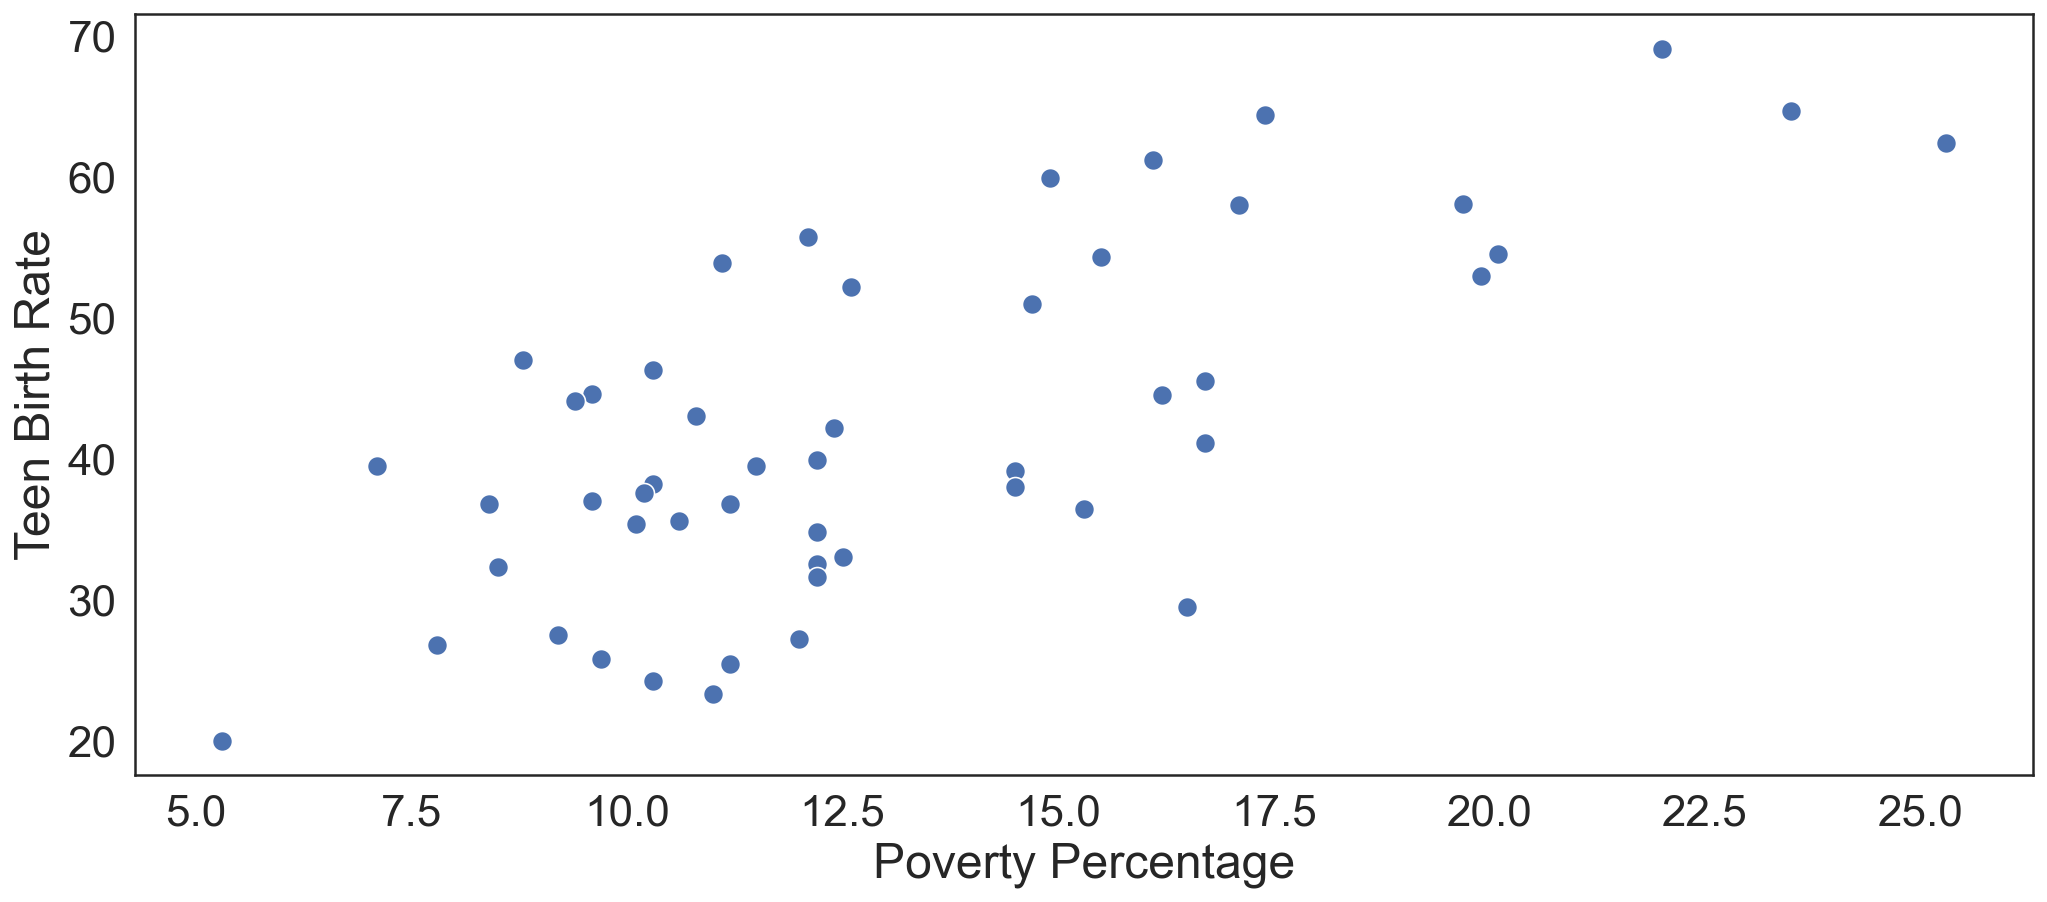

In [23]:
sns.scatterplot(x='PovPct', y='TeenBrth', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate');

We see there is some sort of relationship here, but we want to *measure that realtionship*. Given that the increase appears linear over time (Assumption #1), linear regreasssion allows us to do that.

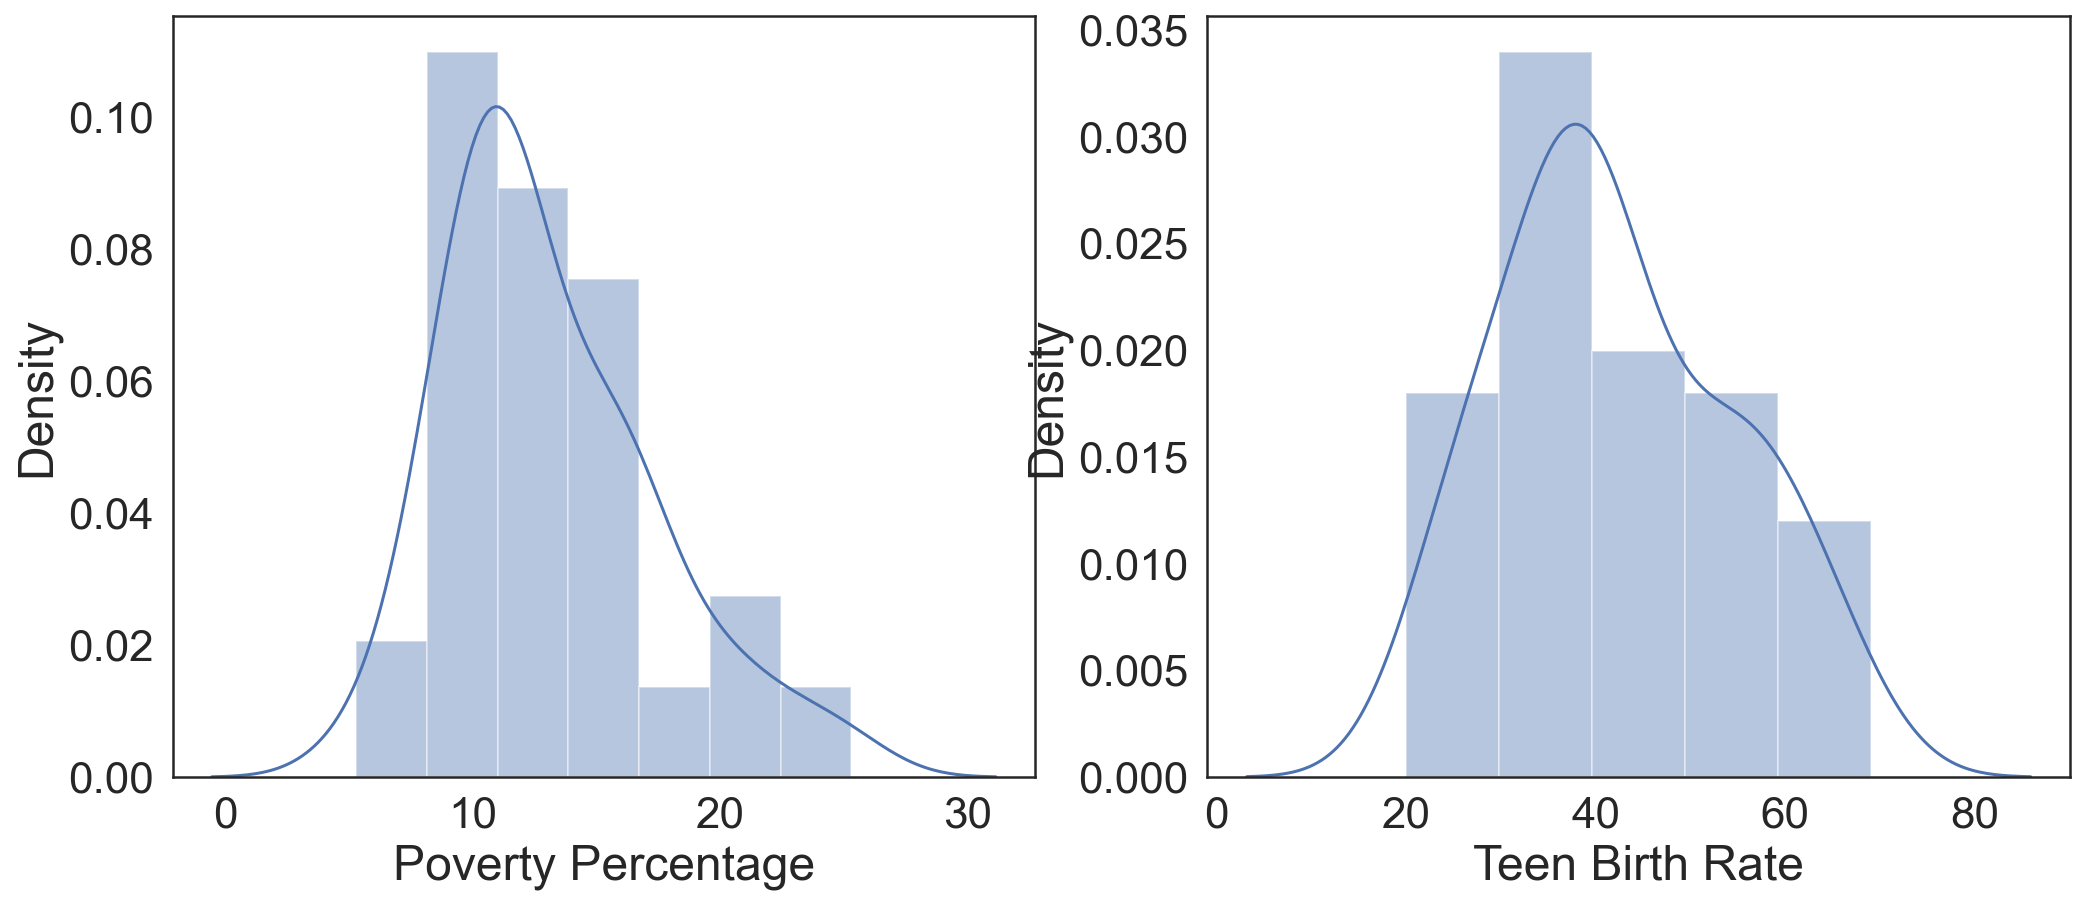

In [24]:
plt.subplot(1, 2, 1)
sns.distplot(df['PovPct'])
plt.xlabel('Poverty Percentage')

plt.subplot(1, 2, 2)
sns.distplot(df['TeenBrth'])
plt.xlabel('Teen Birth Rate');

## Linear Regression

$$outcome = \beta_0 + \beta_1*predictor$$

First, let's be sure we're on the same page about what our outcome is. Here, we're intererested in whether **Poverty Percentage (predictor)** impacts **Teen Birth Rate (outcome)**.

In [25]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# OLD SKOOL way to do this
# We can specify our model matrix using `pastsy`.
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct', df)
model = sm.OLS(outcome, predictors)



#modern version
model = smf.ols(formula='TeenBrth ~ PovPct', data=df)


And, then we just have to fit the model and look at the results.

In [26]:
## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           8.67e-09
Time:                        10:37:43   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

### Clicker Question #1

What is the effect size of the relationship between Poverty Percentage and Teen Birth Rate?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

There is a lot of information in there. Let's focus on the three pieces we discussed last lecture:

- `coef` : $\beta_1$ estimate explaining the effect size
- `std err` : standard error 
- `P>|t|` : the p-value

## Interpretation

$$outcome = \beta_0 + \beta_1*predictor$$

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

If the Poverty Percentage were 0, the Teen Birth Rate would be **15.67** (The Intercept, $\beta_0$)

For every 1 unit increase in Poverty Percentage, you expect to see a **2.03** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

In [ ]:
## look at the results
print(results.summary())

### Clicker Question #2

Which value represents the expected Teen Birth Rate if the Poverty Percentage were 0?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

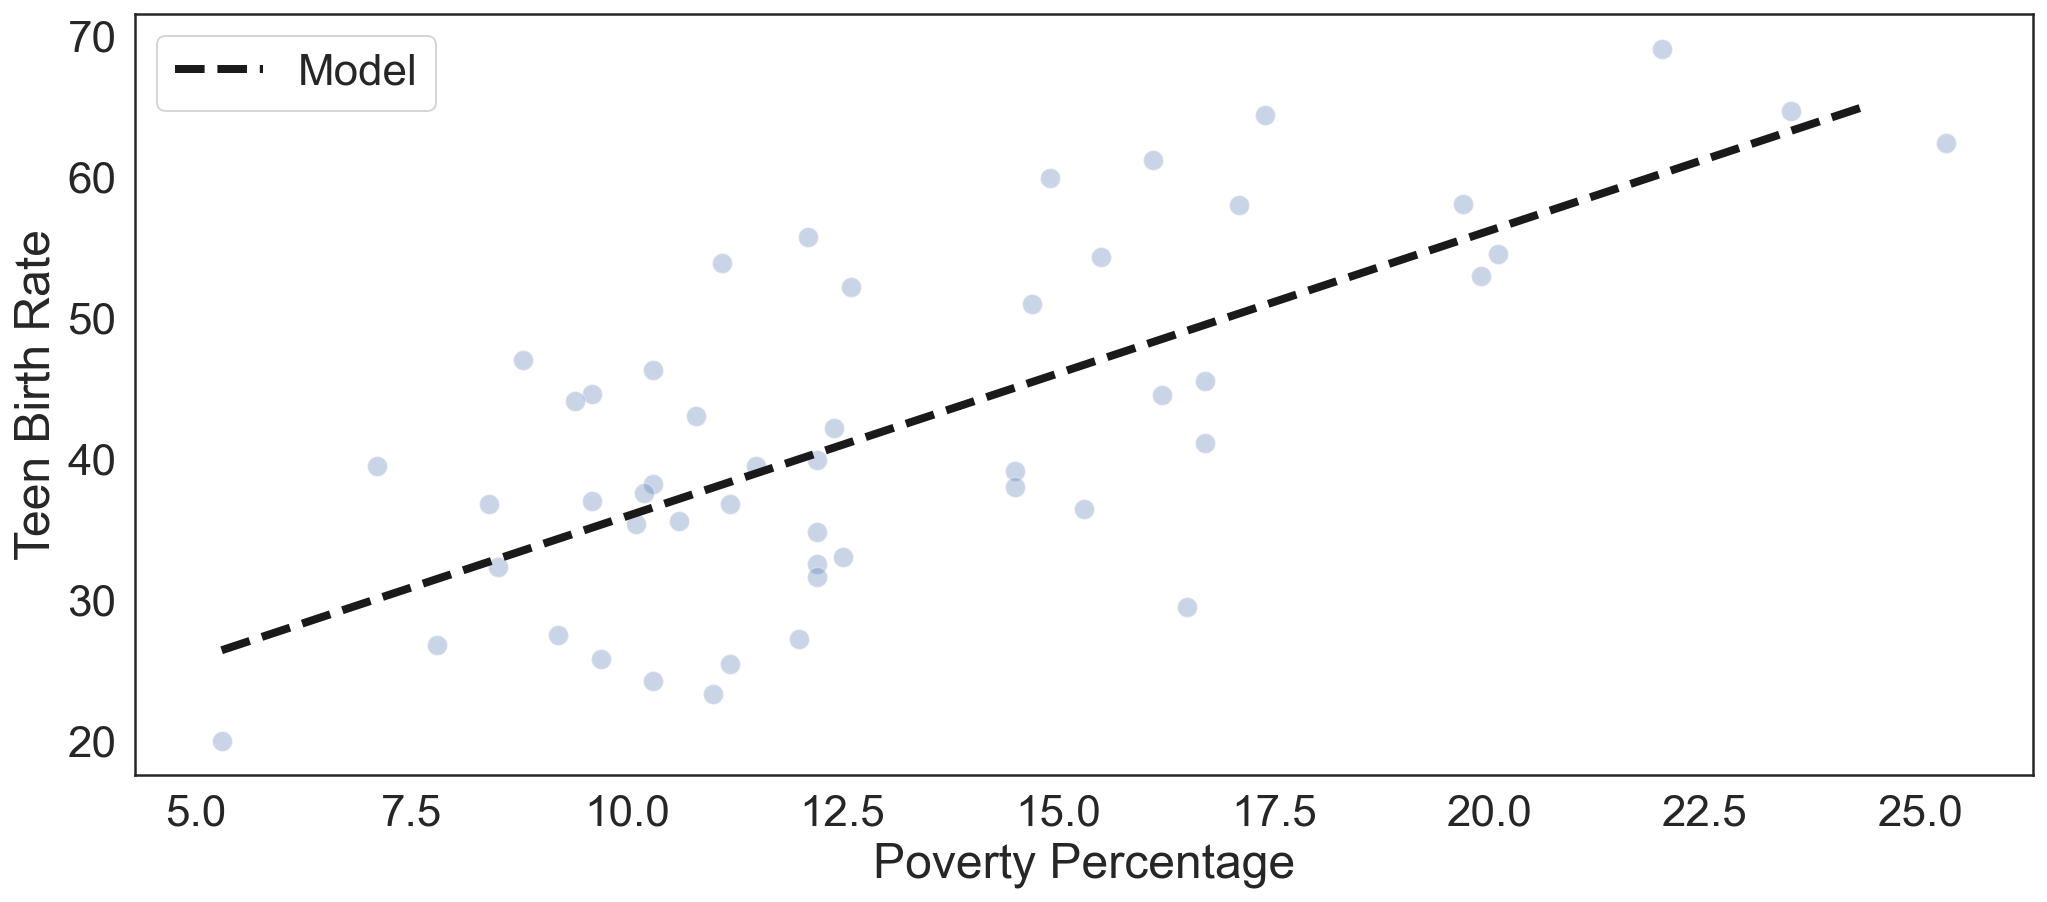

In [27]:
# Plot the orginal data (as before)
sns.scatterplot(x='PovPct', y='TeenBrth', alpha=0.3, data=df, s=100)

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = 2.0255 * xs + 15.67
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

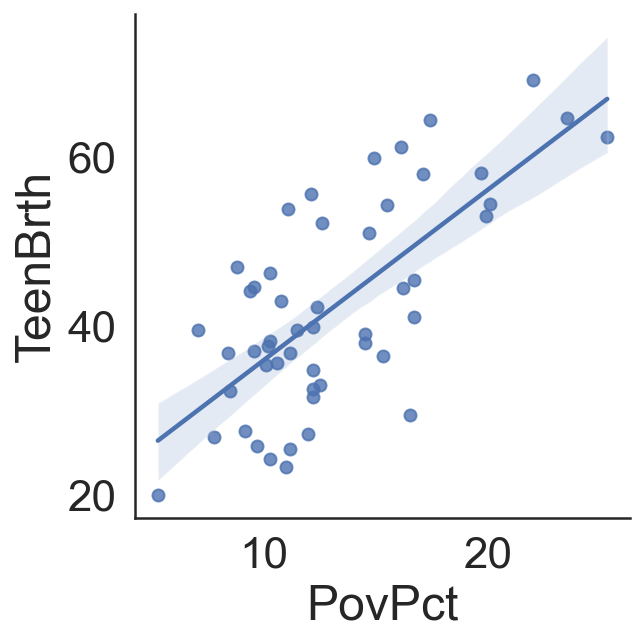

In [31]:
sns.lmplot(x='PovPct', y='TeenBrth', data=df);

The model (the line) mathematically describes the relationship between the data points, but it doesn't explain the relationship *perfectly*. (All models are wrong!)

Note that this line is drawn in the following way:
- if you were to draw a perpendicular line from each point to the line and calculate that distance
- if you were to sum the distance across all points
- this line is the one that minimizes that sum

### Clicker Question #3

If I told you the Poverty Percentage of a state was 15, what would you estimate would be its Teen Birth Rate? 
- A) ~ 0
- B) ~ 30
- C) ~ 40
- D) ~ 50
- E) ~ 60

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

### Clicker Question #4

Which of the following is a reasonable estimate (guess) for a state with a Poverty Percentage of 20?

- A) 55.99
- B) 56.27
- C) 56.5
- D) A - C
- E) None of the above

## Estimates

If I told you a locations' Poverty Percentage, what would you guess its Teen Birth Rate would be?

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

In [ ]:
## if Poverty Percentage were 18
birth_rate = 15.67 + 2.03 * 18
birth_rate

In [ ]:
## if Poverty Percentage were 12
birth_rate = 15.67 + 2.03 * 12
birth_rate

In [32]:
## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           8.67e-09
Time:                        10:19:08   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

### Clicker Question #5

What is our conclusion from this analysis? (Question: Does Poverty Percentage affect Teen Birth Rate?)

- A) Reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- B) Reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate
- C) Fail to reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- D) Fail to reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate


# Multiple Linear Regression

So far, we've only been looking at the relationship of one measure (Poverty Percentage) on Teen Birth. 

*But*, Poverty Percentage is likely *not* the only thing that affects Teen Birth Rate.

We could imagine that Violent Crime rates in a location may affect both Poverty Percentage and could possibly affect Teen Birth Rate. (A confounder!)

This is where **multiple linear regression** is incredibly helpful. Multiple linear regression allows you to measure the effect of multiple predictors on an outcome.

In [34]:

mod = smf.ols(formula='TeenBrth ~ ViolCrime', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     22.15
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.10e-05
Time:                        10:27:20   Log-Likelihood:                -190.42
No. Observations:                  51   AIC:                             384.8
Df Residuals:                      49   BIC:                             388.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.1869      1.936     18.694      0.0

In [33]:

mod = smf.ols(formula='TeenBrth ~ PovPct + ViolCrime', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     30.68
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.61e-09
Time:                        10:23:42   Log-Likelihood:                -178.93
No. Observations:                  51   AIC:                             363.9
Df Residuals:                      48   BIC:                             369.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6848      3.869      4.571      0.0

### Clicker Question #6

Which has a larger effect on Teen Birth Rate?

- A) Poverty Percentage
- B) Violent Crime
- C) Effect is equal across all predictors
- D) No predictors have an effect on outcome

$$ Teen Birth = 17.68 + (1.63  * Poverty Percentage) + (0.4 * Violent Crime) $$

If the Poverty Percntage *and* Violent Crime were both 0, the Teen Birth Rate would be **17.68** (The Intercept)

In [35]:

mod = smf.ols(formula='TeenBrth ~ PovPct * ViolCrime', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     31.75
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.29e-11
Time:                        10:31:25   Log-Likelihood:                -171.69
No. Observations:                  51   AIC:                             351.4
Df Residuals:                      47   BIC:                             359.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8212      5.472  

$$ Teen Birth = 0.82 + (2.4  * Poverty Percentage) + (3.4 * Violent Crime) + -0.14 * PP * VC $$

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.63** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

Holding Poverty Percentage constant, for every 1 unit increase in Violent crime, you'd expect to see a **0.4** unit increase in Teen Birth Rate (The effect size, $\beta_2$)

## No Multiple Colinearity

If we have two predictors, we'll want to consider how similar the values are between predictors (typically, before your generate the model, but we'll do it after for sake of argument today).

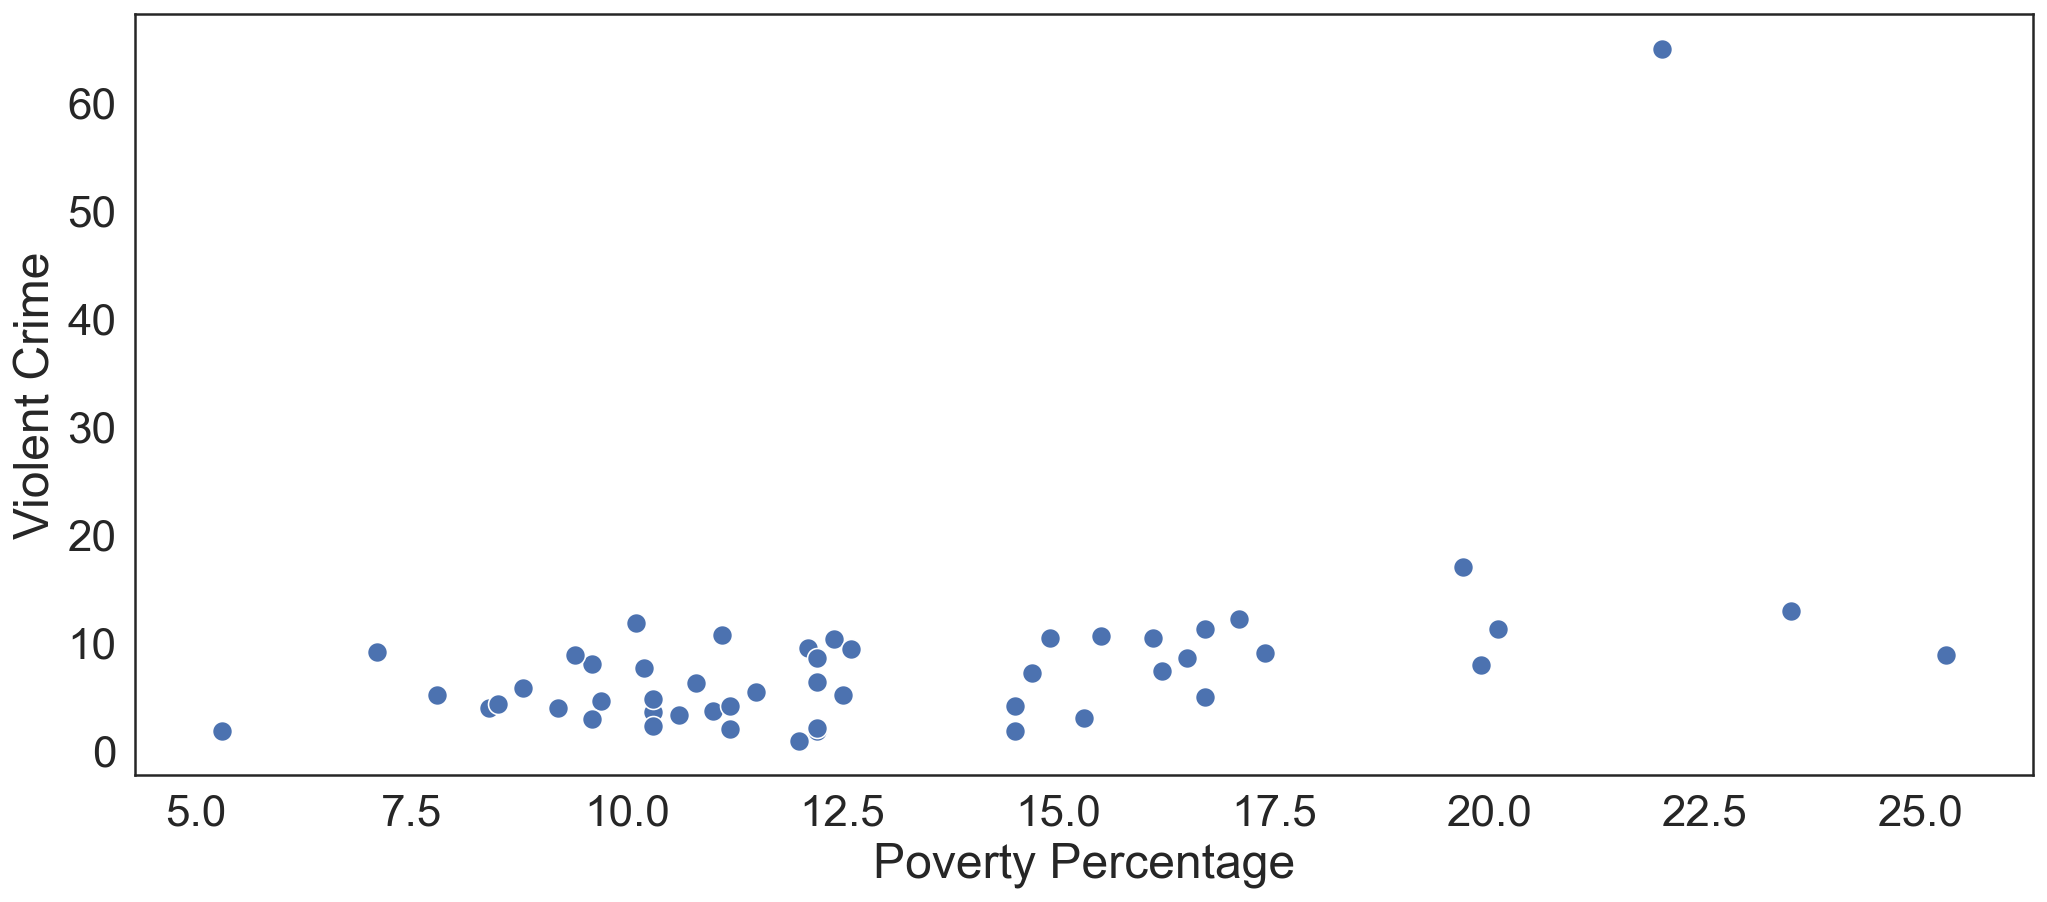

In [36]:
# relationship between predictors
sns.scatterplot(x='PovPct', y='ViolCrime', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

In [37]:
df[df['ViolCrime'] > 50]

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1


### Outlier handling

In [38]:
# removing DC
df = df[df['ViolCrime'] < 50]

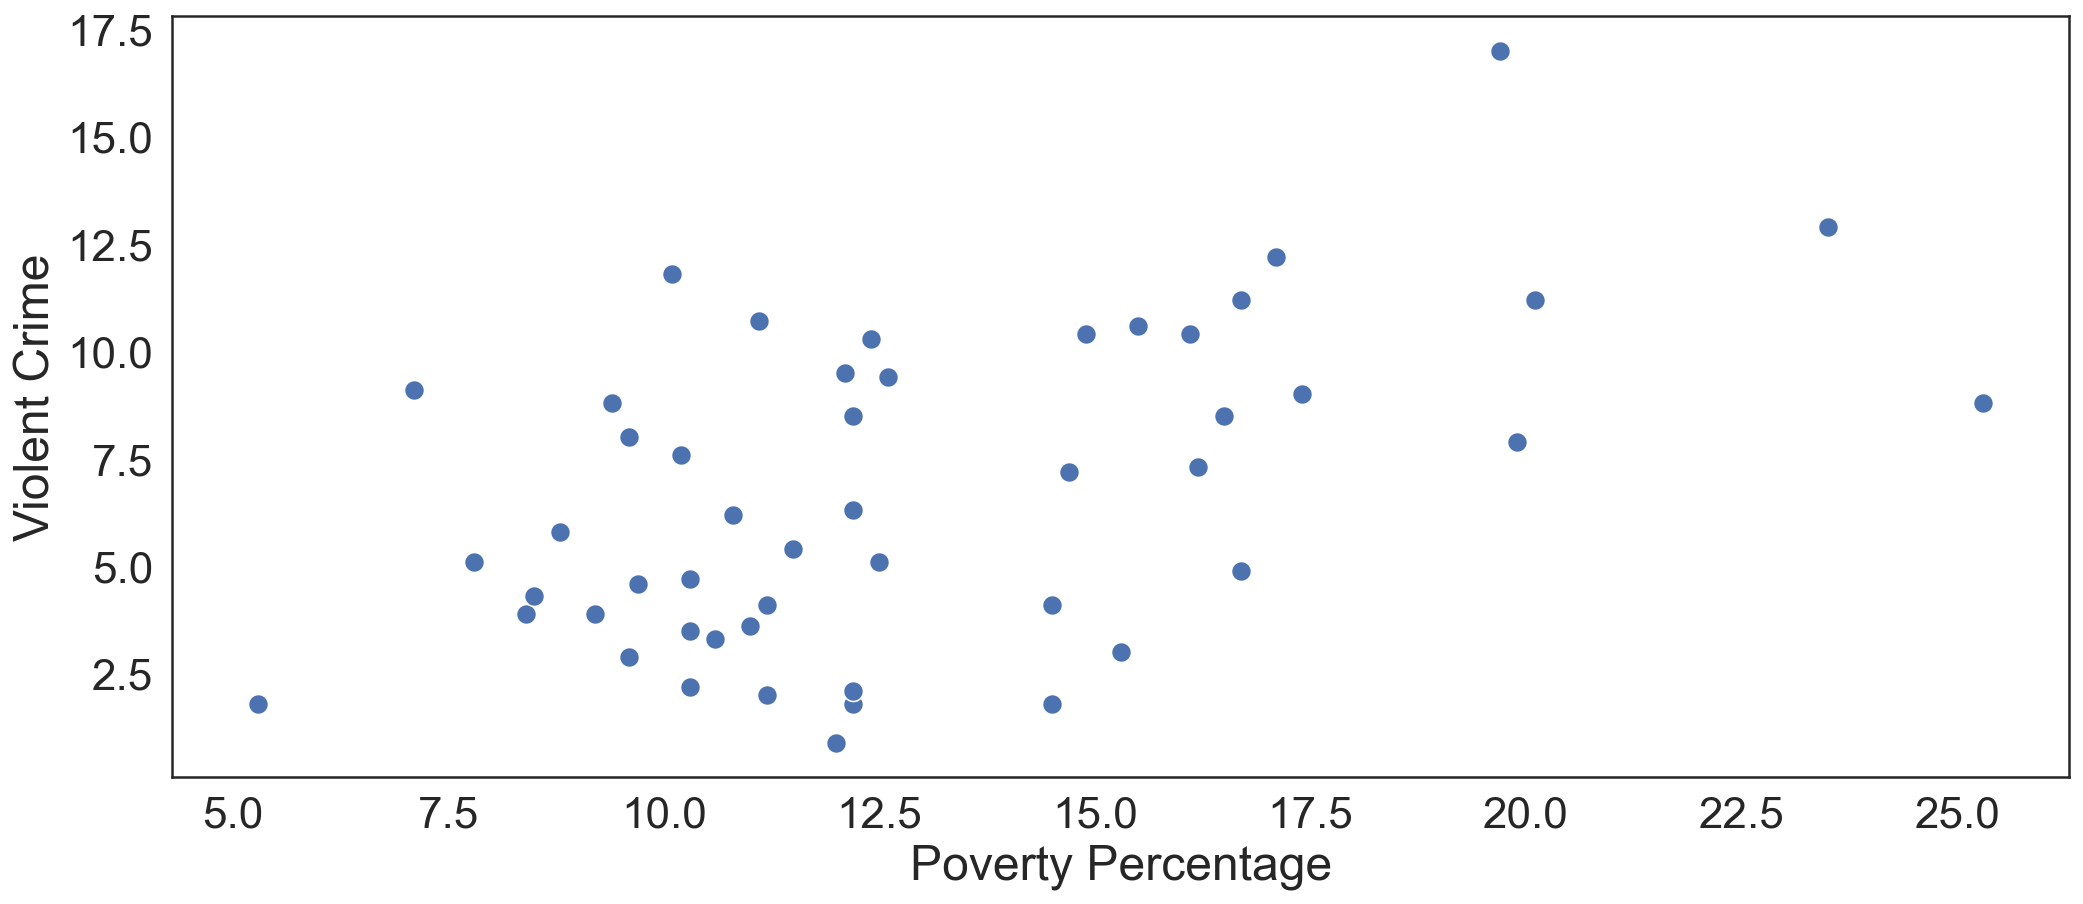

In [39]:
# relationship between predictors
# after removing outlier
sns.scatterplot(x='PovPct', y='ViolCrime', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

In [40]:
# run model

mod = smf.ols(formula='TeenBrth ~ PovPct + ViolCrime', data=df)  
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     41.17
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           4.67e-11
Time:                        10:48:13   Log-Likelihood:                -168.65
No. Observations:                  50   AIC:                             343.3
Df Residuals:                      47   BIC:                             349.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3419      3.431      4.471      0.0

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.19** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

Holding Poverty Percentage constant, for every 1 unit increase in Violent crime, you'd expect to see a **1.63** unit increase in Teen Birth Rate (The effect size, $\beta_2$)

### Clicker Question #7

Which has a larger effect on Teen Birth Rate?

- A) Poverty Percentage
- B) Violent Crime
- C) Effect is equal across all predictors
- D) No predictors have an effect on outcome

Removing the DC outlier led to a different estimate for the effect of violent crime in these data. The inclusion or removal of data in your analyses can affect the results, so it's always important to carefully consider what question you're asking and what data you have. 

# Multicolinearity returns
Lets force a colinearity problem by making a synthetic variable to show you what to look out for...

specifically note that 
1. condition number is large... that's diagnosing the issue
2. coefficient on violent crime changes dramatically from before
3. coefficient on psuedoVC is similar in magnitude to violent crime, robbing it of the explanatory power it deserves
4. the sum of coefficients doesn't arrive at the total it was at in previous model... again robbing it of explanatroy power

In [ ]:
df['psuedoVC'] = df['ViolCrime'] * 3.6 + 112 + 5*pd.np.random.rand(len(df))
mod = smf.ols(formula='TeenBrth ~ PovPct + ViolCrime + psuedoVC', data=df)  
res = mod.fit()
print(res.summary())

# Regression with transformed data

So far, we've been working with data that were approximately Normal and didn't require transformation. But that won't always be the case...

In [41]:
sleep = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/msleep.csv')
sleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


What if we were interested in quantifying the **effect that REM sleep has on total sleep**?

We may hypothesize that the more REM sleep an animal gets the less total sleep it needs.

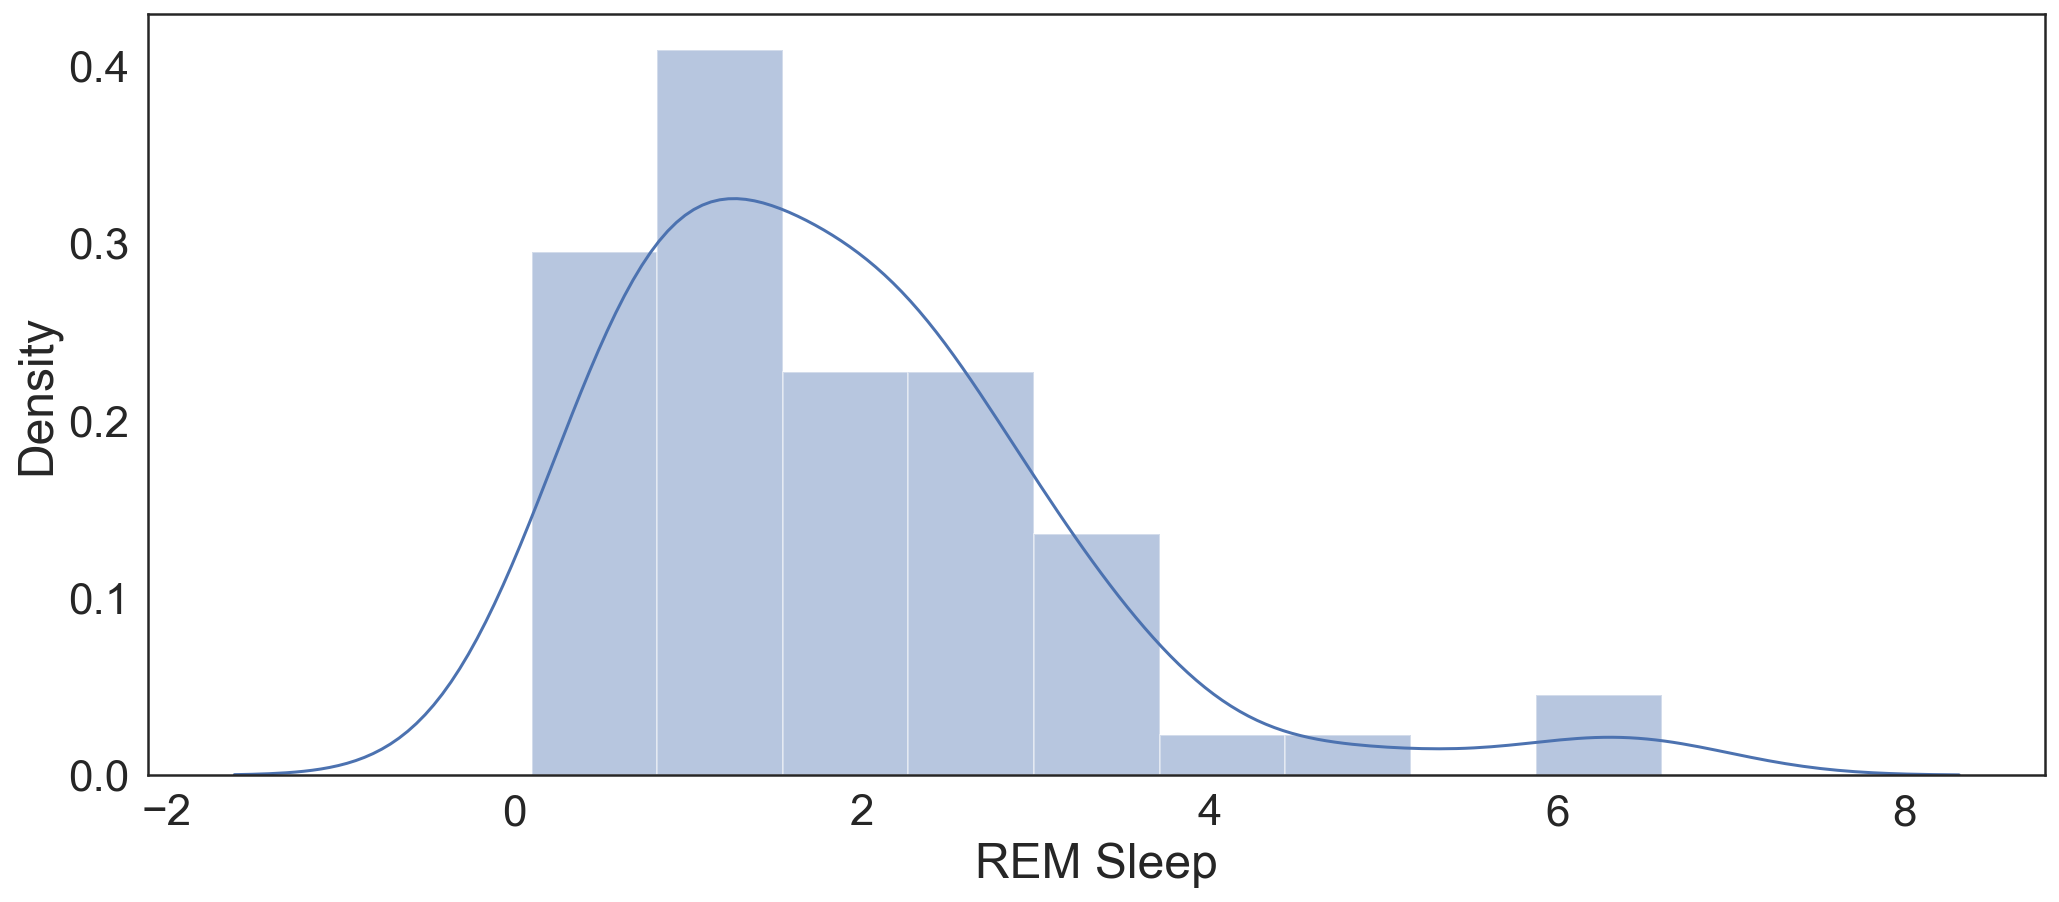

In [42]:
sns.distplot(sleep['sleep_rem'][sleep['sleep_rem'].notnull()],hist=True)
plt.xlabel('REM Sleep');

We saw previously that these data are skewed right, and discussed that transforming these data could help us use them in analysis...

In [ ]:
sns.scatterplot(x='sleep_rem', y='sleep_total', data=sleep, s=100)
plt.xlabel('REM Sleep')
plt.ylabel('Total Sleep');

This relationship is not linear...so linear regression would not be appropriate

### Log Transformation

In [43]:
# add log-transofmed column to sleep_rem & brainwt
sleep['sleep_rem10'] = np.log10(sleep['sleep_rem'])

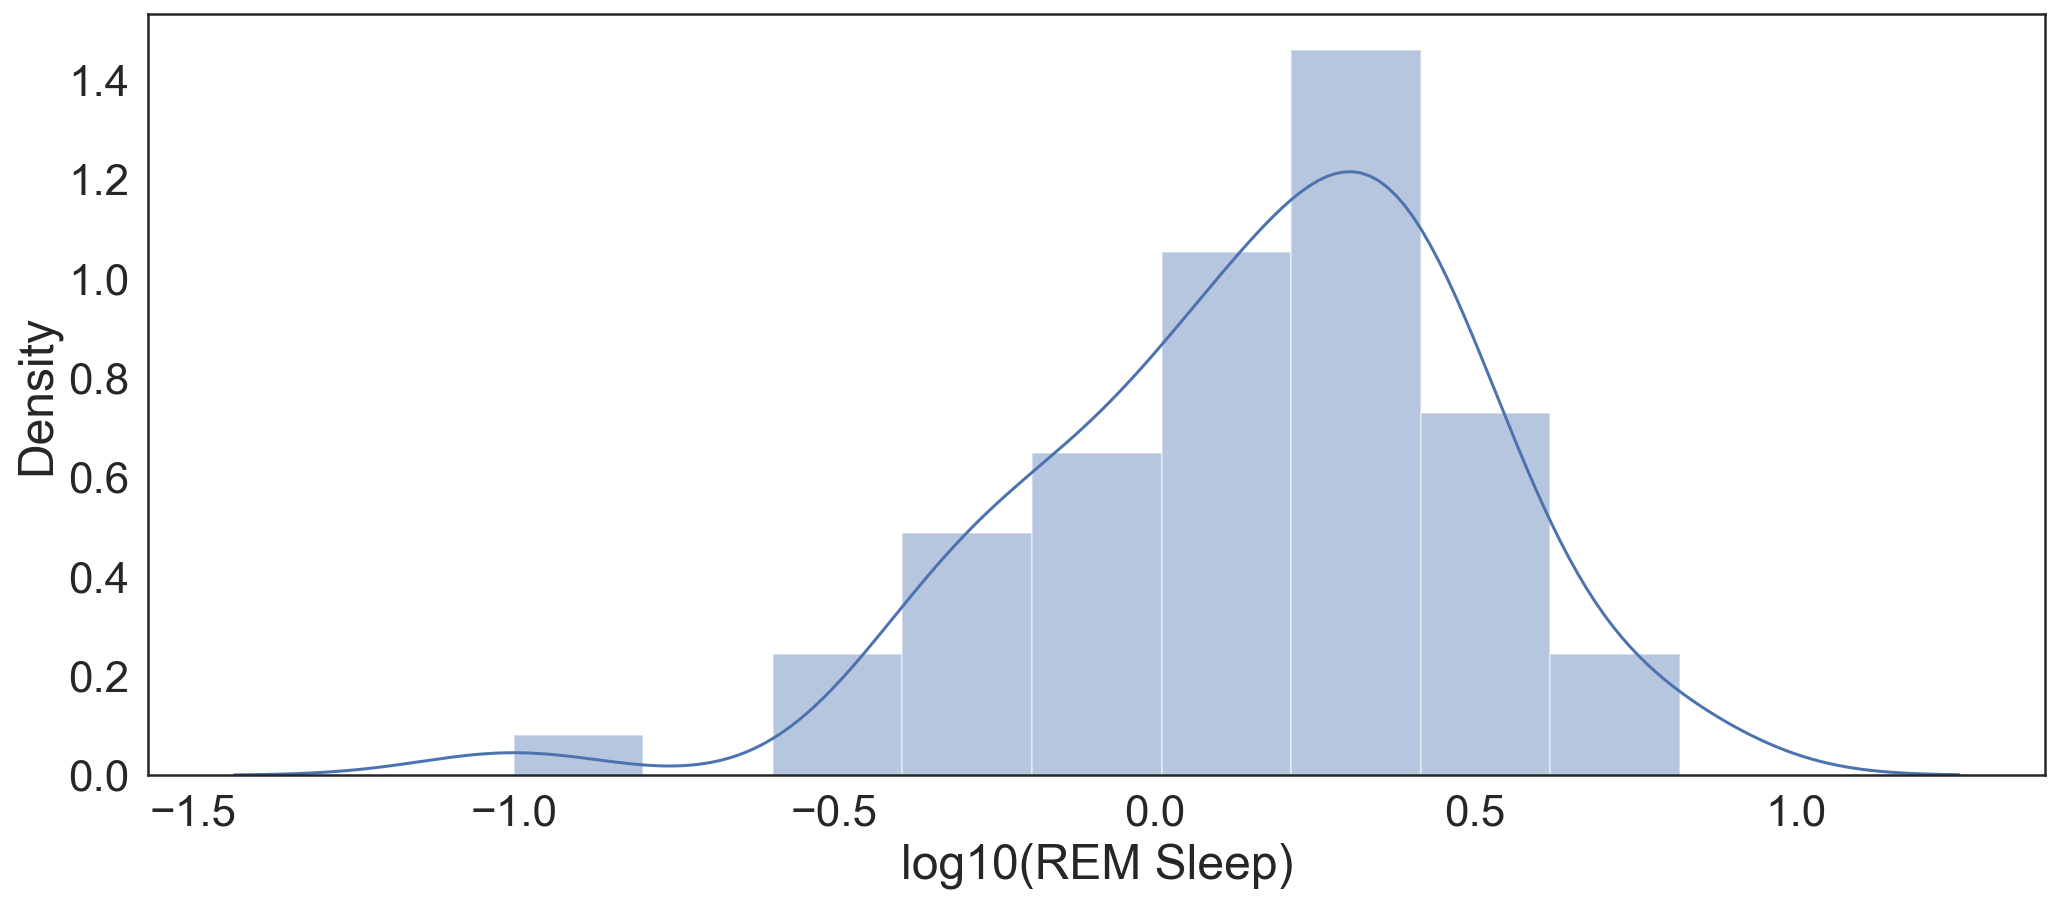

In [44]:
sns.distplot(sleep['sleep_rem10'][sleep['sleep_rem'].notnull()], hist=True)
plt.xlabel('log10(REM Sleep)');

In [ ]:
sns.scatterplot(x='sleep_rem10', y='sleep_total', data=sleep, s=100)
plt.xlabel('log10(REM Sleep)')
plt.ylabel('Total Sleep');

### Linear regression with transformed data

In [45]:
# carry out regression using log-transformed predictor

mod = smf.ols(formula='sleep_total ~ sleep_rem10', data=sleep)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_total   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     100.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.18e-14
Time:                        10:14:10   Log-Likelihood:                -147.84
No. Observations:                  61   AIC:                             299.7
Df Residuals:                      59   BIC:                             303.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.5686      0.399     21.473      

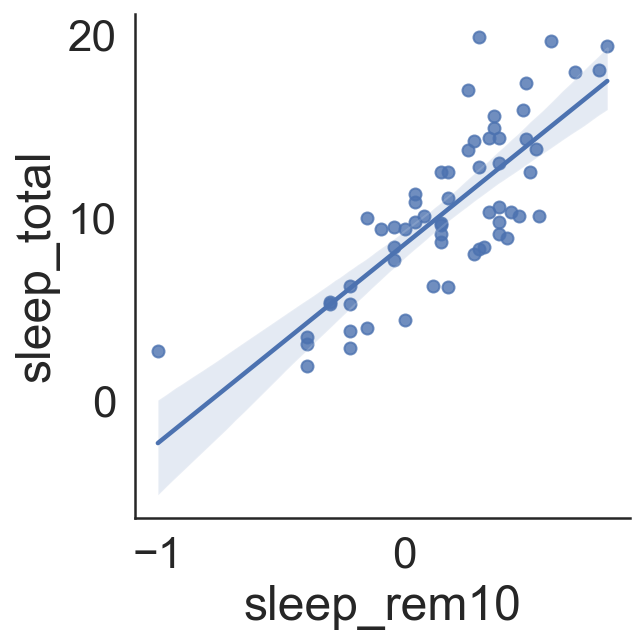

In [46]:
sns.lmplot(x='sleep_rem10',y='sleep_total',data=sleep)

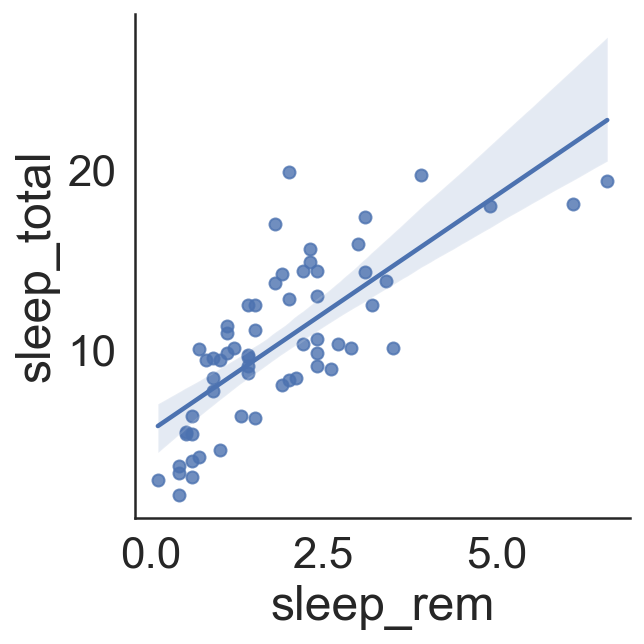

In [47]:
sns.lmplot(x='sleep_rem',y='sleep_total',data=sleep)

Here, we see that the $\beta_1$ estimate for `sleep_rem10` is 10.89....but remember that this value is on the log scale.

$$ Total Sleep = 8.57 + 10.89  * log_{10}(REM Sleep) $$

To interpret this coefficient, we would say that

a 1 unit increase in REM sleep, Total Sleep increases by $\approx$ $10.89/100$ units.

In [ ]:
# interpreting a log transformed coefficient
10.89 / 100

So, for each 1 hour increase in REM Sleep, Total Sleep increases by 0.11 hours. 

That's not a large effect, but it is different than what we hypothesized at the beginning!

More on interpretation of log transformed variables can be read [here](https://www.cscu.cornell.edu/news/statnews/stnews83.pdf)

### Why is log-transformation not math trickery?

First, some reading on data transformation can be found [here](http://fmwww.bc.edu/repec/bocode/t/transint.html). It's not beautifully formatted, but I think it is written in a more-straightforward manner than some [other](https://stats.stackexchange.com/questions/4831/regression-transforming-variables/4833#4833) [places](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va) [online](https://www.researchgate.net/post/Why_do_we_do_transformation_before_data_analysis).

The first thing to remember is there is (in most cases) nothing special about how the data are originally expressed.

In our example above, there is nothing about "hours" as the unit that was chosen that makes these data "correct".

So, while it _feels_ like data transformation is trickery, our initial unit of hours is...in some ways arbitrary and something that we chose.

This is where we'll start with our argument that it's ok to transform (or think of it as *re-express*) our data
so that it can be (still-accurately) used with well-studied models.

To make the point a little more concretely, pH (measurement of acidity) is measured on the log scale. It _could_ be measured (transformed) off of the log scale. Those measurements would still explain a compound's acidity...it would just be on a different scale.

In other words:
    
> "Transformations are needed because there is no guarantee that the world works on the scales it happens to be measured on."

What *does* differ however, is the interprtation. Linear scales tell us absolute change, while logarithmic scales tell us relative change.

In [ ]:
dat = skewnorm.rvs(5, 1, size=1000)
sns.distplot(dat, kde=False, bins=20);

In [ ]:
dat_log = np.log10(dat)
sns.distplot(dat_log, kde=False, bins=20);

In [ ]:
#original value
dat[0]

In [ ]:
# log 10 transformed value
dat_log[0]

In [ ]:
# math that is actually happening
10.0*dat_log[0]

In [ ]:
# linear scale tells you asolute 
# difference between two points
dat[1] - dat[0]

In [ ]:
# log scale tells you relative 
# difference between two points
dat_log[1] - dat_log[0]